In [2]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#########################################################################################################
# Por Delegacias (Furtos e Roubos de Veículos)
#########################################################################################################

In [13]:
#Importa os dados do arquivo CSV e monta o DataFrame com a Base de Dados
#Estatísticas de segurança: série histórica mensal por área de delegacia desde 01/2003
dfBDPorDP = pd.read_csv("https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv", sep= ";", encoding="latin1")
dfBDPorDP.head(2)

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3


In [ ]:
#Cria um database somente com os dados da região = "Capital"
dfBDCapital = dfBDPorDP.loc[dfBDPorDP["regiao"] == 'Capital']
dfBDCapital.head(2)

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3


In [14]:
#Cria uma coluna com a soma dos furtos e roubos de veículos
dfBDCapital["soma_furtos_roubos_veiculos"] = dfBDCapital["furto_veiculos"] + dfBDCapital["roubo_veiculo"]
dfBDCapital.head(2)

C:\Users\paulo.frederico\AppData\Local\Temp\ipykernel_33784\4272700853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBDCapital["soma_furtos_roubos_veiculos"] = dfBDCapital["furto_veiculos"] + dfBDCapital["roubo_veiculo"]


,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,soma_furtos_roubos_veiculos
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,21,2,0,0,0,0,578,3,17
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,15,6,0,1,0,0,441,3,18


In [15]:
#Soma os valores da coluna (soma_furtos_roubos_veiculos) por delegacia (cisp)
dfBDFurtoRouboVeiculos = dfBDCapital.groupby("cisp")["soma_furtos_roubos_veiculos"].sum().reset_index()
dfBDFurtoRouboVeiculos.head(2)

,cisp,soma_furtos_roubos_veiculos
0,1,2489
1,4,3374


In [16]:
#Cria o array com os dados do furto e roubo de veiculos da capital
arrayFurtoRouboVeiculos = np.array(dfBDFurtoRouboVeiculos["soma_furtos_roubos_veiculos"])
arrayFurtoRouboVeiculos

array([ 2489,  3374,  4309,  6742,  3921, 12654,  9632,   180,  2372,
        1472,  3473,  3069, 18078, 11193, 11179, 10131, 13197, 25161,
       22802, 15196, 14474, 12626, 10354, 38772, 14366, 21443, 17691,
       17522, 13675, 25743, 36770, 33178, 10019, 12888, 25864, 32313,
       22286, 10113,  9960,  4390, 17055,    78])

In [17]:
#Cálculo da média, mediana e quartis dos furtos e roubos
mediaFurtoRoubosVeiculos = np.mean(arrayFurtoRouboVeiculos)
medianaFurtoRoubosVeiculos = np.median(arrayFurtoRouboVeiculos)
q1FurtoRoubosVeiculos = np.percentile(arrayFurtoRouboVeiculos, 25)
q2FurtoRoubosVeiculos = np.percentile(arrayFurtoRouboVeiculos, 50)
q3FurtoRoubosVeiculos = np.percentile(arrayFurtoRouboVeiculos, 75)
distanciaFurtoRoubosVeiculos = (mediaFurtoRoubosVeiculos - medianaFurtoRoubosVeiculos) / medianaFurtoRoubosVeiculos
iqrFurtoRoubosVeiculos = q3FurtoRoubosVeiculos - q1FurtoRoubosVeiculos
limiteSuperiorFurtoRoubosVeiculos = q3FurtoRoubosVeiculos + (1.5 * iqrFurtoRoubosVeiculos)
limiteInferiorFurtoRoubosVeiculos = q1FurtoRoubosVeiculos - (1.5 * iqrFurtoRoubosVeiculos)

print(f'Média     = {mediaFurtoRoubosVeiculos:.2f}')
print(f'Mediana   = {medianaFurtoRoubosVeiculos:.2f}')
print(f'Q1        = {q1FurtoRoubosVeiculos:.2f}')
print(f'Q2        = {q2FurtoRoubosVeiculos:.2f}')
print(f'Q3        = {q3FurtoRoubosVeiculos:.2f}')
print(f'Distância = {distanciaFurtoRoubosVeiculos * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. = {limiteSuperiorFurtoRoubosVeiculos:.2f}')
print(f'Lim. Inf. = {limiteInferiorFurtoRoubosVeiculos:.2f}')

Média     = 13862.00
Mediana   = 12640.00
Q1        = 4978.00
Q2        = 12640.00
Q3        = 17981.25
Distância = 9.67 %
Lim. Sup. = 37486.12
Lim. Inf. = -14526.88


In [18]:
#Delegacias que representam os OUTLIERS com MAIOR número de furtos e roubos de veículos
delegacias_MaiorOutlier = dfBDFurtoRouboVeiculos.loc[dfBDFurtoRouboVeiculos["soma_furtos_roubos_veiculos"] >= limiteSuperiorFurtoRoubosVeiculos]
delegacias_MaiorOutlier.sort_values(by="soma_furtos_roubos_veiculos")

,cisp,soma_furtos_roubos_veiculos
23,27,38772


In [19]:
#Como só tem 1 OUTLIER, vou exibir as 5 delegacias com mais roubo
dfBDFurtoRouboVeiculos = dfBDFurtoRouboVeiculos.sort_values('soma_furtos_roubos_veiculos', ascending=False)
dfBDFurtoRouboVeiculosGrafico = dfBDFurtoRouboVeiculos.head(5)

#Transformo a coluna cisp de INT para STRING
dfBDFurtoRouboVeiculosGrafico['cisp'] = dfBDFurtoRouboVeiculosGrafico['cisp'].astype(str)

'''
#Gero o gráfico
plt.bar(dfBDFurtoRouboVeiculosGrafico['cisp'], dfBDFurtoRouboVeiculosGrafico['soma_furtos_roubos_veiculos'], color='orange')
plt.title('Delegacias OUTLIERs por Total de furtos e roubos de veículos')
plt.xlabel('Delegacia')
plt.ylabel('Quantidade')
plt.grid(False)
plt.show()
'''

C:\Users\paulo.frederico\AppData\Local\Temp\ipykernel_33784\1483177082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBDFurtoRouboVeiculosGrafico['cisp'] = dfBDFurtoRouboVeiculosGrafico['cisp'].astype(str)


"\n#Gero o gráfico\nplt.bar(dfBDFurtoRouboVeiculosGrafico['cisp'], dfBDFurtoRouboVeiculosGrafico['soma_furtos_roubos_veiculos'], color='orange')\nplt.title('Delegacias OUTLIERs por Total de furtos e roubos de veículos')\nplt.xlabel('Delegacia')\nplt.ylabel('Quantidade')\nplt.grid(False)\nplt.show()\n"

In [ ]:
#########################################################################################################
# Por Município (Furtos de Veículos por Município)
#########################################################################################################

In [22]:
#Importa os dados do arquivo CSV e monta o DataFrame com a Base de Dados
#Estatísticas de segurança: série histórica mensal por município desde 2014
dfBDPorMunicipio = pd.read_csv("https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv", sep= ";", encoding="latin1")
dfBDPorMunicipio.head(2)

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,11,...,8,0,98,13,3,0,0,0,561,3
1,3300159,Aperibé,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [24]:
#####################################################################################################
# Hoje, após sucessivas leis estaduais, e com a promulgação da Constituição do Estado do Rio de Janeiro em 1998
# , a RMRJ possui 22 municípios: Belford Roxo, Cachoeiras de Macacu, Duque de Caxias, Guapimirim, Itaboraí
# , Itaguaí, Japeri, Magé, Maricá, Mesquita, Nilópolis, Niterói, Nova Iguaçu, Paracambi, Petrópolis, Queimados
# , Rio Bonito, Rio de Janeiro, São Gonçalo, São João de Meriti, Seropédica e Tanguá
# FONTE: https://www.rj.gov.br/irm/formacao_rjrm
#####################################################################################################

#Cria um database somente com os dados da região Metropolitana
regMetropolitana = ["Rio de Janeiro", "Niterói", "Belford Roxo", "Cachoeiras de Macacu", "Duque de Caxias", "Guapimirim", "Itaboraí",
                    "Itaguaí", "Japeri", "Magé", "Maricá", "Mesquita", "Nilópolis", "Nova Iguaçu", "Paracambi", "Petrópolis",
                    "Queimados", "Rio Bonito", "Seropédica", "São Gonçalo", "São João de Meriti", "Tanguá"]

#dfBDRegMetropolitana = dfBDUltimaDecada.loc[dfBDUltimaDecada["fmun"].isin(regMetropolitana)]
#dfBDRegMetropolitana

#Filtra a base com os dados da região metropolitana e da última década
dfBDRegMetropolitana = dfBDPorMunicipio.loc[(dfBDPorMunicipio["fmun"].isin(regMetropolitana)) & (dfBDPorMunicipio["ano"] >= 2015)]
dfBDRegMetropolitana

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
1112,3300456,Belford Roxo,2015,1,2015m01,Baixada Fluminense,20,0,1,21,...,0,0,148,15,0,0,0,0,1280,3
1116,3300803,Cachoeiras de Macacu,2015,1,2015m01,Interior,0,0,0,0,...,0,0,36,1,0,0,0,0,162,3
1128,3301702,Duque de Caxias,2015,1,2015m01,Baixada Fluminense,42,0,2,44,...,0,0,359,34,1,0,1,0,3291,3
1130,3301850,Guapimirim,2015,1,2015m01,Baixada Fluminense,2,0,0,2,...,0,0,36,2,1,0,0,0,180,3
1132,3301900,Itaboraí,2015,1,2015m01,Interior,6,0,0,6,...,0,0,89,7,0,0,0,0,799,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12856,3304557,Rio de Janeiro,2025,8,2025m08,Capital,86,2,2,90,...,326,68,2037,232,19,0,0,0,39553,2
12861,3304904,São Gonçalo,2025,8,2025m08,Grande Niterói,5,0,0,5,...,29,0,159,24,1,0,0,0,2463,2
12863,3305109,São João de Meriti,2025,8,2025m08,Baixada Fluminense,7,0,0,7,...,23,0,168,17,2,0,0,0,2040,2
12870,3305554,Seropédica,2025,8,2025m08,Baixada Fluminense,1,0,0,1,...,5,0,37,5,1,0,0,0,316,2


In [25]:
#Soma os valores da coluna (furto_veiculos) por municipio (fmun)
dfBDFurtoVeiculos = dfBDRegMetropolitana.groupby("fmun")["furto_veiculos"].sum().reset_index()
dfBDFurtoVeiculos

,fmun,furto_veiculos
0,Belford Roxo,4345
1,Cachoeiras de Macacu,247
2,Duque de Caxias,11318
3,Guapimirim,398
4,Itaboraí,2362
5,Itaguaí,1297
6,Japeri,524
7,Magé,2401
8,Maricá,2077
9,Mesquita,2441


In [26]:
#Cria o array com os dados do furto de veiculos
arrayFurtoVeiculos = np.array(dfBDFurtoVeiculos["furto_veiculos"])
arrayFurtoVeiculos

array([ 4345,   247, 11318,   398,  2362,  1297,   524,  2401,  2077,
        2441,  2106,  7247, 10082,   213,  1373,  1460,   940, 77126,
         632, 12185,  5715,   190])

In [27]:
#Cálculo da média, mediana e quartis dos furtos e roubos
mediaFurtoVeiculos = np.mean(arrayFurtoVeiculos)
medianaFurtoVeiculos = np.median(arrayFurtoVeiculos)
q1FurtoVeiculos = np.percentile(arrayFurtoVeiculos, 25)
q2FurtoVeiculos = np.percentile(arrayFurtoVeiculos, 50)
q3FurtoVeiculos = np.percentile(arrayFurtoVeiculos, 75)
distanciaFurtoVeiculos = (mediaFurtoVeiculos - medianaFurtoVeiculos) / medianaFurtoVeiculos
iqrFurtoVeiculos = q3FurtoVeiculos - q1FurtoVeiculos
limiteSuperiorFurtoVeiculos = q3FurtoVeiculos + (1.5 * iqrFurtoVeiculos)
limiteInferiorFurtoVeiculos = q1FurtoVeiculos - (1.5 * iqrFurtoVeiculos)

print(f'Média     = {mediaFurtoVeiculos:.2f}')
print(f'Mediana   = {medianaFurtoVeiculos:.2f}')
print(f'Q1        = {q1FurtoVeiculos:.2f}')
print(f'Q2        = {q2FurtoVeiculos:.2f}')
print(f'Q3        = {q3FurtoVeiculos:.2f}')
print(f'Distância = {distanciaFurtoVeiculos * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. = {limiteSuperiorFurtoVeiculos:.2f}')
print(f'Lim. Inf. = {limiteInferiorFurtoVeiculos:.2f}')

Média     = 6667.23
Mediana   = 2091.50
Q1        = 709.00
Q2        = 2091.50
Q3        = 5372.50
Distância = 218.78 %
Lim. Sup. = 12367.75
Lim. Inf. = -6286.25


In [28]:
#Municípios que representam os OUTLIERS com MAIOR número de furtos de veículos
municipios_MaiorOutlier = dfBDFurtoVeiculos.loc[dfBDFurtoVeiculos["furto_veiculos"] >= limiteSuperiorFurtoVeiculos]
municipios_MaiorOutlier.sort_values(by="furto_veiculos")

,fmun,furto_veiculos
17,Rio de Janeiro,77126


In [42]:
#Ordeno pelo valor de venda antes de exibir no gráfico
dfBDFurtoVeiculos.sort_values(by="furto_veiculos", ascending=False, inplace=True)
dfBDFurtoVeiculosGrafico = dfBDFurtoVeiculos.head(5)

'''
#Gero o gráfico
plt.barh(municipios_MaiorOutlier['fmun'], municipios_MaiorOutlier['furto_veiculos'], color='pink')
plt.title('Municípios OUTLIERs por quantidade de furtos de veículos')
plt.xlabel('qtde. furto de veículos')
plt.ylabel('Município')
plt.grid(False)
plt.show()
'''

"\n#Gero o gráfico\nplt.barh(municipios_MaiorOutlier['fmun'], municipios_MaiorOutlier['furto_veiculos'], color='pink')\nplt.title('Municípios OUTLIERs por quantidade de furtos de veículos')\nplt.xlabel('qtde. furto de veículos')\nplt.ylabel('Município')\nplt.grid(False)\nplt.show()\n"

In [31]:
#########################################################################################################
# Por UPP (Apreensão de Drogas)
#########################################################################################################

In [32]:
#Importa os dados do arquivo CSV e monta o DataFrame com a Base de Dados
#Estatísticas de segurança: série histórica mensal por área de Unidade de Polícia Pacificadora (01/2007 a 06/2021)
dfBDUPP = pd.read_csv("https://www.ispdados.rj.gov.br/Arquivos/UppEvolucaoMensalDeTitulos.csv", delimiter=";", encoding="latin1")
dfBDUPP.head(2)

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,armas_apreendidas,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,2,1,0,0,0,0,0,0,0,11
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,7,2,11,7,2,0,0,0,0,98


In [33]:
#Soma os valores da coluna de apreensão de drogas (apreensao_drogas) por UPP (cod_upp)
dfBDApreensaoDrogas = dfBDUPP.groupby("cod_upp")["apreensao_drogas"].sum().reset_index()
dfBDApreensaoDrogas.head(2)

,cod_upp,apreensao_drogas
0,1,228
1,2,2818


In [34]:
#Cria o array com os dados de apreensão de drogas
arrayApreensaoDrogas = np.array(dfBDApreensaoDrogas["apreensao_drogas"])
arrayApreensaoDrogas

array([ 228, 2818,  310,  361,  655,  538,  716,  555,  205,  389,  306,
        441,  312,  486,  226,  500,  774,  618,  302,  259,  286,  295,
        257,  163,  121,  107,  549,  636, 1132,  526,  627,  275,  122,
        598,  415,  245,  590, 1363])

In [35]:
#Cálculos estatísticos
mediaAPDrogas = np.mean(arrayApreensaoDrogas)
medianaAPDrogas = np.median(arrayApreensaoDrogas)
q1APDrogas = np.percentile(arrayApreensaoDrogas, 25)
q2APDrogas = np.percentile(arrayApreensaoDrogas, 50)
q3APDrogas = np.percentile(arrayApreensaoDrogas, 75)
distanciaAPDrogas = (mediaAPDrogas - medianaAPDrogas) / medianaAPDrogas
iqrAPDrogas = q3APDrogas - q1APDrogas
limSupAPDrogas = q3APDrogas + (1.5 * iqrAPDrogas)
limInfAPDrogas = q1APDrogas - (1.5 * iqrAPDrogas)

print(f'Média     = {mediaAPDrogas:.2f}')
print(f'Mediana   = {medianaAPDrogas:.2f}')
print(f'Q1        = {q1APDrogas:.2f}')
print(f'Q2        = {q2APDrogas:.2f}')
print(f'Q3        = {q3APDrogas:.2f}')
print(f'Distância = {distanciaAPDrogas * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. = {limSupAPDrogas:.2f}')
print(f'Lim. Inf. = {limInfAPDrogas:.2f}')

Média     = 508.05
Mediana   = 402.00
Q1        = 263.00
Q2        = 402.00
Q3        = 596.00
Distância = 26.38 %
Lim. Sup. = 1095.50
Lim. Inf. = -236.50


In [36]:
#UPPs que representam os OUTLIERS com MAIOR número de apreensão de drogas
dpApreensaoDrogasMaiorOutlier = dfBDApreensaoDrogas.loc[dfBDApreensaoDrogas["apreensao_drogas"] >= limSupAPDrogas]
dpApreensaoDrogasMaiorOutlier.sort_values(by="apreensao_drogas", ascending=False)

,cod_upp,apreensao_drogas
1,2,2818
37,38,1363
28,29,1132


In [40]:
#OBS: Passo a coluna cod_upp para STRING para não aparecer no gráfco valores intermediários
dpApreensaoDrogasMaiorOutlier['cod_upp'] = dpApreensaoDrogasMaiorOutlier['cod_upp'].astype(str)

#Ordeno pela quantidade de apreensão de drogas antes de exibir o gráfico
dpApreensaoDrogasMaiorOutlier.sort_values(by="apreensao_drogas", ascending=False, inplace=True)

'''
#Gero o gráfico
plt.bar(dpApreensaoDrogasMaiorOutlier['cod_upp'], dpApreensaoDrogasMaiorOutlier['apreensao_drogas'], color='red')
plt.title('Códigos das UPPs OUTLIERs com maiores apreensões de drogas')
plt.xlabel('Código da UPP')
plt.ylabel('Qtde. apreensão de drogas')
plt.grid(False)
plt.show()
'''

C:\Users\paulo.frederico\AppData\Local\Temp\ipykernel_33784\1709556111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpApreensaoDrogasMaiorOutlier['cod_upp'] = dpApreensaoDrogasMaiorOutlier['cod_upp'].astype(str)
C:\Users\paulo.frederico\AppData\Local\Temp\ipykernel_33784\1709556111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpApreensaoDrogasMaiorOutlier.sort_values(by="apreensao_drogas", ascending=False, inplace=True)


"\n#Gero o gráfico\nplt.bar(dpApreensaoDrogasMaiorOutlier['cod_upp'], dpApreensaoDrogasMaiorOutlier['apreensao_drogas'], color='red')\nplt.title('Códigos das UPPs OUTLIERs com maiores apreensões de drogas')\nplt.xlabel('Código da UPP')\nplt.ylabel('Qtde. apreensão de drogas')\nplt.grid(False)\nplt.show()\n"

In [37]:
#########################################################################################################
# Criação do Gráfico Consolidado
#########################################################################################################

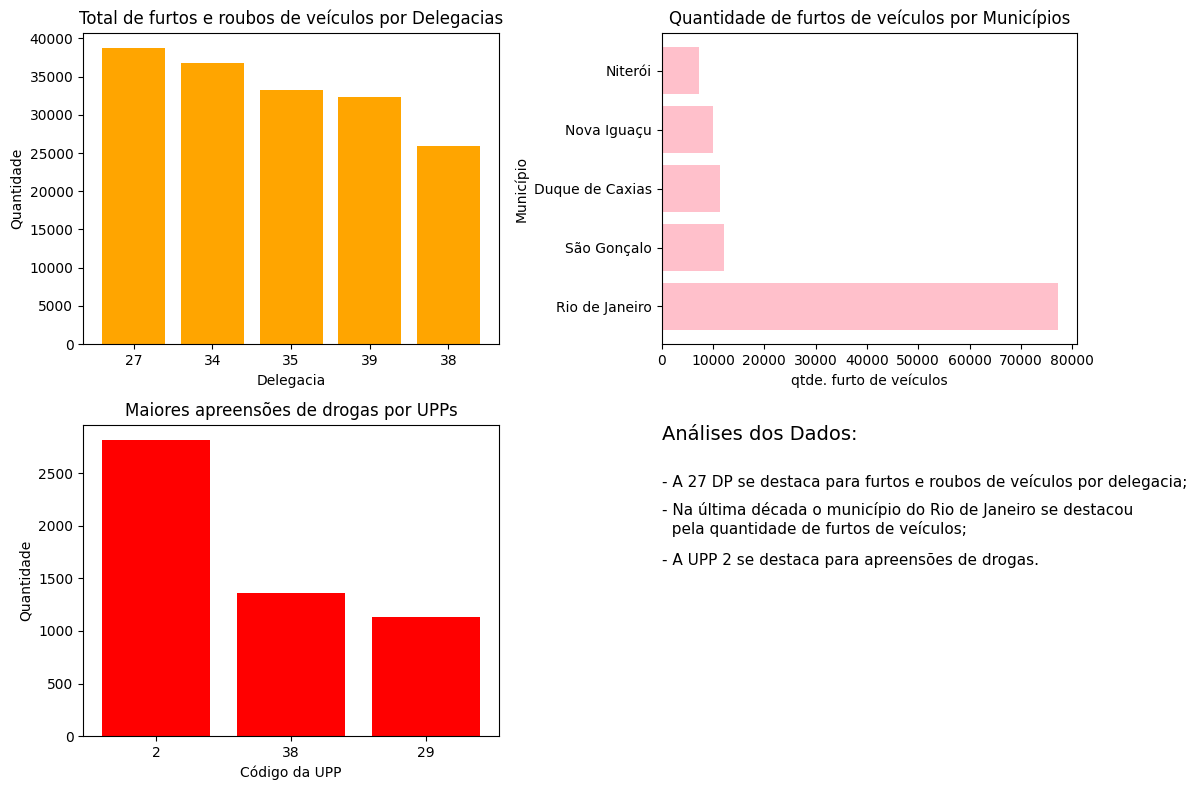

In [62]:
#Cria uma figura com 4 áreas de gráficos (2 linhas x 2 colunas)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#Gráfico 1: Barras Verticais - Furto e Roubo de Veículos por Delegacias
axs[0,0].bar(dfBDFurtoRouboVeiculosGrafico['cisp'], dfBDFurtoRouboVeiculosGrafico['soma_furtos_roubos_veiculos'], color='orange')
axs[0,0].set_title('Total de furtos e roubos de veículos por Delegacias')
axs[0,0].set_xlabel('Delegacia')
axs[0,0].set_ylabel('Quantidade')
#axs[0,0].set_grid(False)

#Gráfico 2: Barras Horizontais - Furto de Veículos por Municípios
axs[0,1].barh(dfBDFurtoVeiculosGrafico['fmun'], dfBDFurtoVeiculosGrafico['furto_veiculos'], color='pink')
axs[0,1].set_title('Quantidade de furtos de veículos por Municípios')
axs[0,1].set_xlabel('qtde. furto de veículos')
axs[0,1].set_ylabel('Município')
#axs[0,1].set_grid(False)

#Gráfico 3: Barras Verticais - Apreensão de drogas por UPP
axs[1,0].bar(dpApreensaoDrogasMaiorOutlier['cod_upp'], dpApreensaoDrogasMaiorOutlier['apreensao_drogas'], color='red')
axs[1,0].set_title('Maiores apreensões de drogas por UPPs')
axs[1,0].set_xlabel('Código da UPP')
axs[1,0].set_ylabel('Quantidade')
#axs[1,0].set_grid(False)

#Gráfico 4: Quadro de texto explicativo
axs[1,1].axis('off')    #Desativa os eixos para poder incluir texto
axs[1,1].text(0.0, 0.95, 'Análises dos Dados:', fontsize=14, color='black')
axs[1,1].text(0.0, 0.80, '- A 27 DP se destaca para furtos e roubos de veículos por delegacia;', fontsize=11, color='black')
axs[1,1].text(0.0, 0.65, '- Na última década o município do Rio de Janeiro se destacou\n  pela quantidade de furtos de veículos;', fontsize=11, color='black')
axs[1,1].text(0.0, 0.55, '- A UPP 2 se destaca para apreensões de drogas.', fontsize=11, color='black')


#Ajusta os espaços entre os gráficos para evitar sobreposição
plt.tight_layout()

#Exibe todos os gráficos
plt.show()